In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import missingno as mn #missingno had to be installed 'pip install missingno' 
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
#sample = pd.read_csv('sample_submission.csv') not useful


In [3]:
train.index

RangeIndex(start=0, stop=1460, step=1)

In [4]:
train #what do we have? 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
# let's start looking at the data, print out colname, type, 

#[print("{} {}".format(col, type(test[col][1]))) for col in columns]

#df.dtypes is much easier way to doing this

train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [6]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [7]:
#split the int and float class from the str classes 

intCols = train.columns[(train.dtypes == 'int64')| (train.dtypes == 'float64')]
strCols = train.columns[train.dtypes == 'object']


In [8]:
dfInt = train[intCols]

In [9]:
dfInt.shape

(1460, 38)

In [10]:
dfStr = train[strCols]

In [11]:
dfStr.shape # we screwed up a bit, we should convert all floats to ints first # fixed this by including float64 to boolean filter

(1460, 43)

In [12]:
dfInt.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

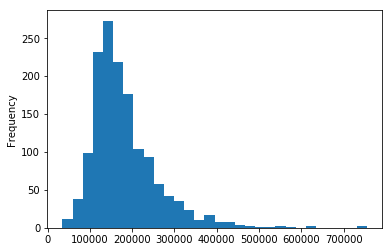

In [13]:
#taking a look at sale price 
train.SalePrice.plot.hist(bins = 30)

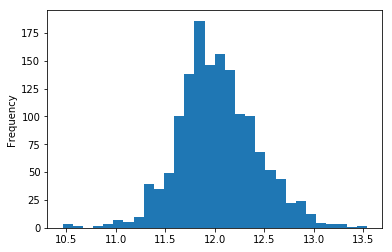

In [14]:
#hist of log of sales price 
train.SalePrice.apply(lambda x: math.log(x)).plot.hist(bins = 30)

In [15]:
# let's start sorting out some missingness starting with Int data
nulls = []
for col in intCols:
    nulls.append([col,sum(dfInt[col].isnull())])

In [202]:
nulls = pd.DataFrame(nulls, columns = (['col', 'nulls']))

In [209]:
nulls.loc[nulls.nulls != 0] # short list of colnames with nuls took too long 

,col,nulls
2,LotFrontage,259
8,MasVnrArea,8
25,GarageYrBlt,81


In [210]:
dfInt.LotFrontage.describe() #where are the missing datas? 

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [173]:
#let's also take a count of how many fields are zeros. may also be missing data
#lots of points are 0 
#nulls = []
#for col in intCols:
    #print((col, sum(dfInt[col] == 0)))
    

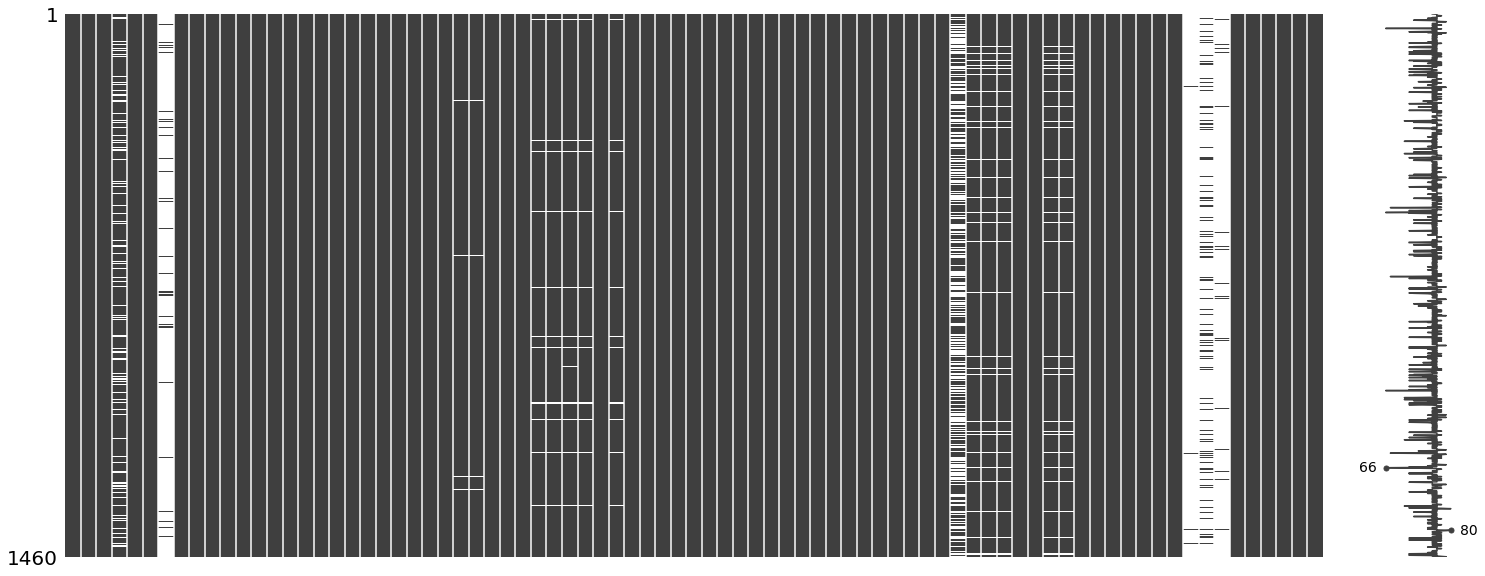

In [213]:
mn.matrix(train)

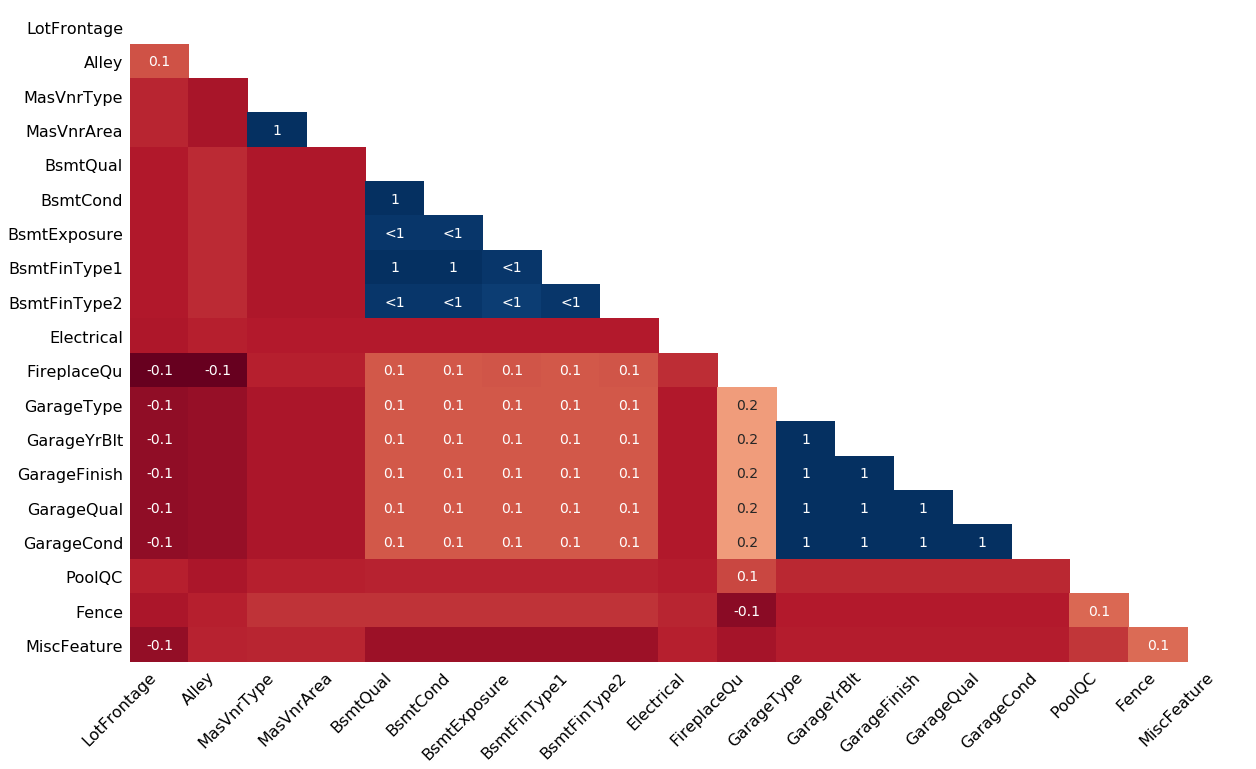

In [214]:
mn.heatmap(train)

In [17]:
#creating category bins for sales price 
dfInt.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [26]:
from scipy.stats import binned_statistic

data = dfInt.SalePrice
bin_means = binned_statistic(data, data)[0]

In [27]:
bin_means

array([  86214.08108108,  142361.5560166 ,  208531.19571046,
        281972.4       ,  354766.1372549 ,  425545.57894737,
        499959.25      ,  564838.        ,  618328.5       ,  750000.        ])

In [41]:
np.histogram(dfInt.SalePrice.apply(lambda x: math.log(x)))[1] #histogram of log values. should probably make a separate column of log sales

array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
        11.68993448,  11.99735757,  12.30478066,  12.61220375,
        12.91962684,  13.22704994,  13.53447303])

In [46]:
#making column of log sales
LogSale = dfInt.SalePrice.apply(lambda x: math.log(x))
#append to train data
train['LogSale'] = LogSale
dfInt['LogSale'] = LogSale

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

In [48]:
dfInt.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LogSale'],
      dtype='object')

In [50]:
bins = np.histogram(dfInt.LogSale)[1]
bins #creating bins of sales used to help visualize 

array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
        11.68993448,  11.99735757,  12.30478066,  12.61220375,
        12.91962684,  13.22704994,  13.53447303])

In [52]:
trial = np.digitize(dfInt.LogSale, bins = bins) #selecting bin value according to LogSales

In [60]:
dfInt['SaleBin'] = trial
dfStr['SaleBin'] = trial
train['SaleBin'] = trial

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
# using stats.crosstab to set up data for visualization 

Zones = pd.crosstab(train.SaleBin, train.MSZoning, normalize = 'index')
Zones

MSZoning,C (all),FV,RH,RL,RM
SaleBin,,,,,
1,0.600000,0.000000,0.000000,0.200000,0.200000
2,0.083333,0.000000,0.000000,0.583333,0.333333
3,0.055556,0.000000,0.055556,0.407407,0.481481
4,0.010870,0.000000,0.010870,0.586957,0.391304
5,0.002128,0.017021,0.019149,0.759574,0.202128
6,0.000000,0.077500,0.005000,0.887500,0.030000
7,0.000000,0.090909,0.000000,0.886364,0.022727
8,0.000000,0.066667,0.000000,0.911111,0.022222
9,0.000000,0.000000,0.000000,0.947368,0.052632


In [74]:
train.

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive